In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


# 1)predict Delivery Time

In [2]:
data=pd.read_csv("D:/ASSIGNMENTS/Assign4 (simple reg)/delivery_time.csv")
data.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.shape

(21, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.isna().sum()

DeliveryTime    0
SortingTime     0
dtype: int64

In [6]:
data.skew()

DeliveryTime    0.352390
SortingTime     0.047115
dtype: float64

In [7]:
data.kurtosis()

DeliveryTime    0.317960
SortingTime    -1.148455
dtype: float64

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

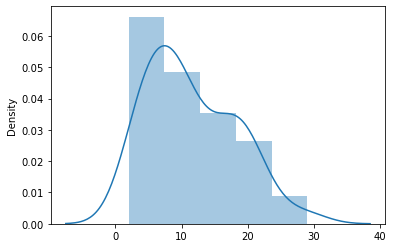

In [8]:
sns.distplot(data)

In [9]:
#data is right skewed

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

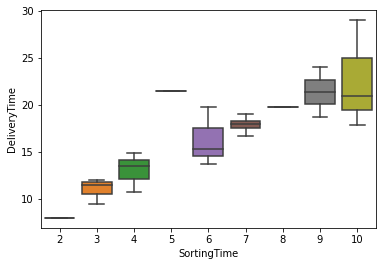

In [10]:
sns.boxplot(x="SortingTime",y="DeliveryTime",data=data)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

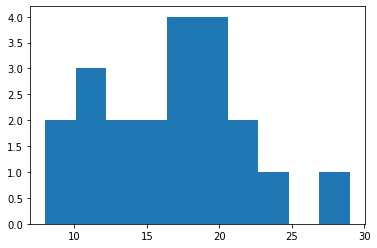

In [11]:
plt.hist(data['DeliveryTime'])

In [12]:
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


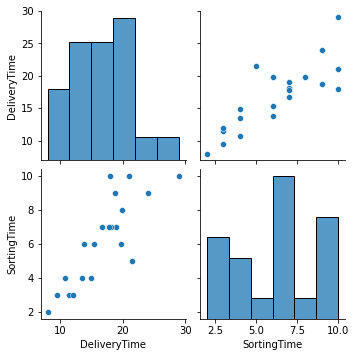

In [13]:
sns.pairplot(data)

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

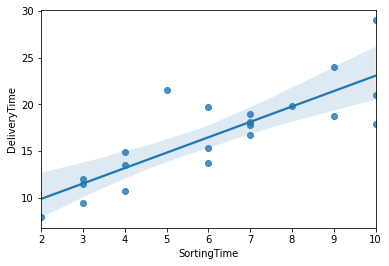

In [14]:
sns.regplot(x='SortingTime',y='DeliveryTime',data=data)

In [30]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [32]:
array=data.values

In [48]:
scaler=MinMaxScaler(feature_range=(0,1))
rescaledx=scaler.fit_transform(array)
set_printoptions(precision=2)
print(rescaledx[0:5,:])

[[0.62 1.  ]
 [0.26 0.25]
 [0.56 0.5 ]
 [0.76 0.88]
 [1.   1.  ]]


In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(array)
rescaledx=scaler.transform(array)
set_printoptions(precision=2)
print(rescaledx[0:5,:])

[[ 0.85  1.54]
 [-0.66 -0.88]
 [ 0.6  -0.08]
 [ 1.46  1.13]
 [ 2.47  1.54]]


In [53]:
model=smf.ols("DeliveryTime~SortingTime",data=data).fit()
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [16]:
print(model.tvalues,'\n',model.pvalues)

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [17]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [18]:
#Rsquared value < 0.85 so its not stronger relationship between x and y.

In [19]:
newdata=pd.Series([7,8])
data_pred=pd.DataFrame(newdata,columns=['SortingTime'])

In [20]:
model.predict(data_pred)

0    18.125873
1    19.774893
dtype: float64

In [54]:
model.predict(data)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

# 2) Predict Salary  

In [21]:
salary=pd.read_csv("D:/ASSIGNMENTS/Assign4 (simple reg)/Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [64]:
salary=salary.rename({'YearsExperience':'Exp'},axis=1)
salary.head(2)

,Exp,Salary
0,1.1,39343.0
1,1.3,46205.0


In [22]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [23]:
salary.shape

(30, 2)

In [24]:
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

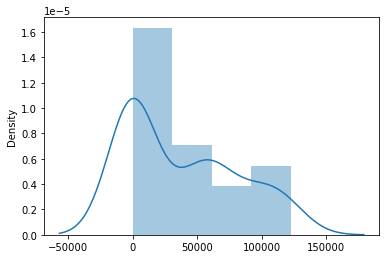

In [25]:
sns.distplot(salary)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

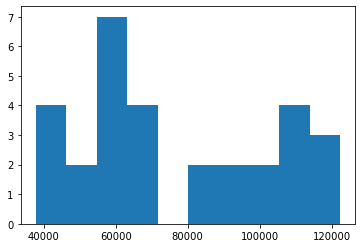

In [26]:
plt.hist(salary['Salary'])

In [27]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


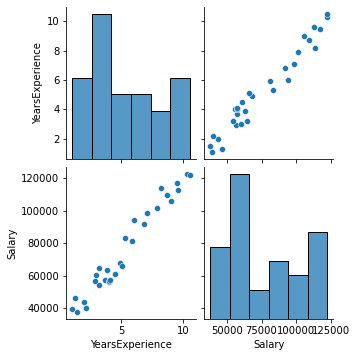

In [28]:
sns.pairplot(salary)

In [59]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array=salary.values

scaler=MinMaxScaler(feature_range=(0,1))
rescaledx=scaler.fit_transform(array)
set_printoptions(precision=2)
print(rescaledx[0:5,:])


[[0.   0.02]
 [0.02 0.1 ]
 [0.04 0.  ]
 [0.1  0.07]
 [0.12 0.03]]


In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(array)
rescaledx=scaler.transform(array)
set_printoptions(precision=2)
print(rescaledx[0:5,:])

[[-1.51 -1.36]
 [-1.44 -1.11]
 [-1.37 -1.42]
 [-1.19 -1.2 ]
 [-1.12 -1.34]]


In [66]:
model=smf.ols('Salary~Exp',data=salary).fit()
model.params

Intercept    25792.200199
Exp           9449.962321
dtype: float64

In [67]:
print(model.tvalues,'\n',model.pvalues)

Intercept    11.346940
Exp          24.950094
dtype: float64 
 Intercept    5.511950e-12
Exp          1.143068e-20
dtype: float64


In [68]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [ ]:
# Rsquared >0.85 that means stronger Relationship

In [74]:
new_data=pd.Series([3])
data_pred=pd.DataFrame(new_data,columns=['Exp'])


In [75]:
model.predict(data_pred)

0    54142.087163
dtype: float64

In [76]:
model.predict(salary)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64